In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltac
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

In [6]:
df=pd.read_csv('../dataset/heart_disease.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
cols=['id','diagnosis']
feature_title=[x for x in df.columns if x not in cols]
X=df[feature_title]
y=df['diagnosis']

In [15]:
X.shape,y.shape

((569, 30), (569,))

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
X_train.shape,y_train.shape

((455, 30), (455,))

In [32]:
X_test.shape,y_test.shape

((114, 30), (114,))

In [33]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
test_pred=clf.predict(X_test)
test_pred.shape

(114,)

In [22]:
y_test.shape

(114,)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.9736842105263158

<h1>SVM</h1>

In [41]:
#SVM alone
#adaboost with SVM

# Import Support Vector Classifier
from sklearn.svm import SVC

from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Train Adaboost Classifer
model = svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


<h1>SVM with adaboost</h1>

In [37]:
#adaboost with SVM

# Import Support Vector Classifier
from sklearn.svm import SVC

from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8070175438596491


<h1>Decision Tree</h1>

In [49]:
#Mixed with decision and and adaboost
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=5)
model2.fit(X_train,y_train)

model2 = model2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred =  model2.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


In [51]:
#change label into number
label=y
label=label.replace({"B":0,"M":1})

In [58]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scores = cross_val_score(model2, X, label, cv=5, scoring='neg_root_mean_squared_error')

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

_scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(estimator=model2,
                               X=X,
                               y=label,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
print(results)

Mean score of -0.29 with a standard deviation of 0.03
{'fit_time': array([0.01984596, 0.0227747 , 0.01070404, 0.01568294, 0.0314014 ]), 'score_time': array([0.01577139, 0.015733  , 0.0157876 , 0.01599813, 0.01224327]), 'test_accuracy': array([0.90350877, 0.9122807 , 0.92982456, 0.94736842, 0.89380531]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.83333333, 0.88372093, 0.925     , 0.92857143, 0.78846154]), 'train_precision': array([1., 1., 1., 1., 1.]), 'test_recall': array([0.93023256, 0.88372093, 0.88095238, 0.92857143, 0.97619048]), 'train_recall': array([1., 1., 1., 1., 1.]), 'test_f1': array([0.87912088, 0.88372093, 0.90243902, 0.92857143, 0.87234043]), 'train_f1': array([1., 1., 1., 1., 1.])}


In [65]:
print(f"Training Accuracy scores: {results['train_accuracy']}")
print(f"Mean Training Accuracy: {results['train_accuracy'].mean()*100}")
print(f"Training Precision scores: {results['train_precision']}")
print(f"Mean Training Precision: {results['train_precision'].mean()}")
print(f"Training Recall scores: {results['train_recall']}")
print(f"Mean Training Recall: {results['train_recall'].mean()}")
print(f"Training F1 scores: {results['train_f1']}")
print(f"Mean Training F1 Score: {results['train_f1'].mean()}")
print(f"Validation Accuracy scores: {results['test_accuracy']}")
print(f"Mean Validation Accuracy: {results['test_accuracy'].mean()*100}")
print(f"Validation Precision scores: {results['test_precision']}")
print(f"Mean Validation Precision: {results['test_precision'].mean()}")
print(f"Validation Recall scores: {results['test_recall']}")
print(f"Mean Validation Recall: {results['test_recall'].mean()}")
print(f"Validation F1 scores: {results['test_f1'].mean()}")
print(f"Mean Validation F1 Score: {results['test_f1'].mean()}")
             
             

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy: 100.0
Training Precision scores: [1. 1. 1. 1. 1.]
Mean Training Precision: 1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall: 1.0
Training F1 scores: [1. 1. 1. 1. 1.]
Mean Training F1 Score: 1.0
Validation Accuracy scores: [0.90350877 0.9122807  0.92982456 0.94736842 0.89380531]
Mean Validation Accuracy: 91.73575531749728
Validation Precision scores: [0.83333333 0.88372093 0.925      0.92857143 0.78846154]
Mean Validation Precision: 0.8718174461197717
Validation Recall scores: [0.93023256 0.88372093 0.88095238 0.92857143 0.97619048]
Mean Validation Recall: 0.9199335548172758
Validation F1 scores: 0.893238537569405
Mean Validation F1 Score: 0.893238537569405


<h1>Decision Tree with Adaboost</h1>

In [39]:
#Mixed with decision and and adaboost
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=5)
model2.fit(X_train,y_train)
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=model2,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
!pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 330.3 kB/s eta 0:00:01
     ------------------------ ------------- 30.7/47.0 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 262.8 kB/s eta 0:00:00


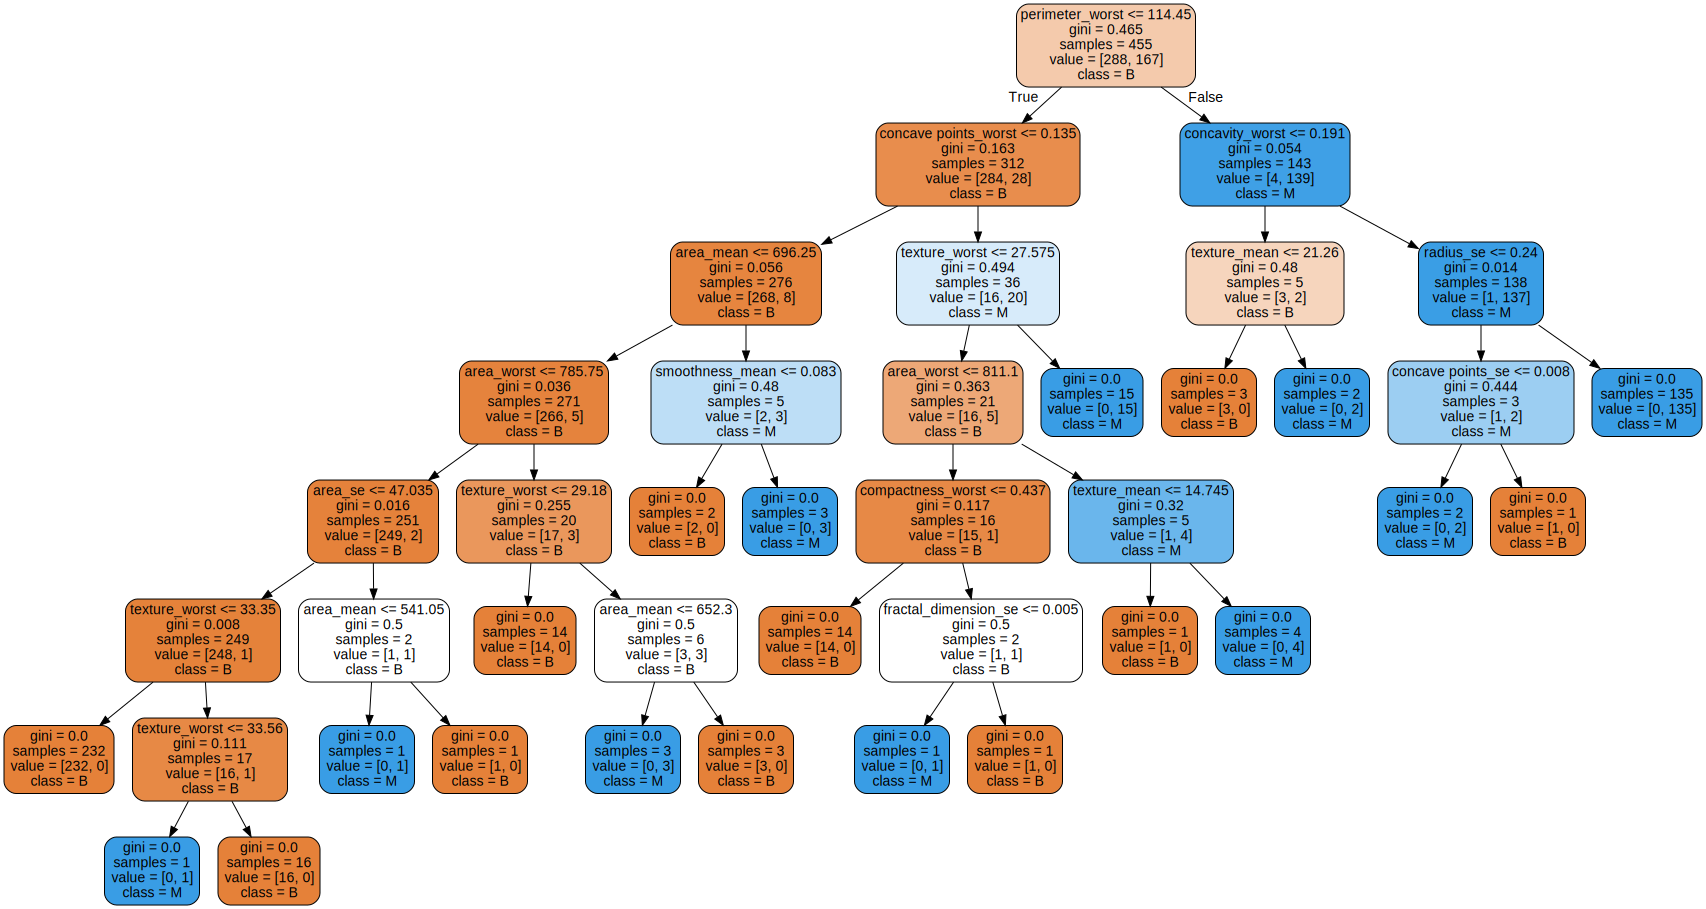

In [46]:
import graphviz
from sklearn import tree


cname = ['B','M']
graphdata = tree.export_graphviz(model2,feature_names=feature_title,class_names=cname,
                                filled=True,rounded=True)
graph = graphviz.Source(graphdata)
graph